# Temat: Co z moim pociągiem?
https://www.kaggle.com/datasets/gatandubuc/public-transport-traffic-data-in-france

#### Celem jest przygotowanie danych do modelowania
#### Kwestia otwarta czy chcemy modelowanie w naszych projektach 

moim pociągiem?
https://www.kaggle.com/datasets/gatandubuc/public-transport-traffic-data-in-france

## Cel -> analiza opóźnień pociągów we Francji

## Stakeholder -> zarządca kolejowy, który potrzebuje zidentyfikować powody opóźnień na wybranych liniach kolejowych


#### Import bibliotek

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import DataCleainingFunctions as dc
import datetime as dt

ModuleNotFoundError: No module named 'DataCleainingFunctions'

#### Wczytanie pliku Regularities_by_liaisons_Trains_France.csv

In [8]:
df = pd.read_csv('data/Regularities_by_liaisons_Trains_France.csv')

In [7]:
pd.set_option('display.max_columns', None)

#### Kopia zapasowa pliku CSV

In [5]:
df_clean = df.copy()

#### Wstawienie "_" w miejsce spacji

In [20]:
df.columns = df.columns.str.replace(" ", "_")

#### Usunięcie 2 kolumn

In [10]:
df.drop(['Comment (optional) delays at departure', 'Comment (optional) delays on arrival'], axis=1, inplace=True)


#### Sprawdzenie czy dane są zduplikowane

In [9]:
df.duplicated().sum()

0

In [25]:
df.head(10)

,Year,Month,Departure_station,Arrival_station,Average_travel_time_(min),Number_of_expected_circulations,Number_of_cancelled_trains,Number_of_late_trains_at_departure,Average_delay_of_late_departing_trains_(min),Average_delay_of_all_departing_trains_(min),Number_of_trains_late_on_arrival,Average_delay_of_late_arriving_trains_(min),Average_delay_of_all_arriving_trains_(min),"%_trains_late_due_to_external_causes_(weather,_obstacles,_suspicious_packages,_malevolence,_social_movements,_etc.)","%_trains_late_due_to_railway_infrastructure_(maintenance,_works)","%_trains_late_due_to_traffic_management_(rail_line_traffic,_network_interactions)",%_trains_late_due_to_rolling_stock,%_trains_late_due_to_station_management_and_reuse_of_material,"%_trains_late_due_to_passenger_traffic_(affluence,_PSH_management,_connections)",Number_of_late_trains_>_15min,Average_train_delay_>_15min,Number_of_late_trains_>_30min,Number_of_late_trains_>_60min,Period,Delay_due_to_external_causes,Delay_due_to_railway_infrastructure,Delay_due_to_traffic_management,Delay_due_to_rolling_stock,Delay_due_to_station_management_and_reuse_of_material,Delay_due_to_travellers_taken_into_account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,41.0,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,47.0,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,91.0,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,15.0,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,73.0,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
5,2019,7.0,PARIS MONTPARNASSE,TOULOUSE MATABIAU,266.594737,190.0,0.0,123.0,4.765989,2.887719,28.0,47.343452,8.422105,0.259259,0.333333,0.222222,0.185185,0.000000,0.000000,28.0,47.343452,13.0,4.0,2019-07,25.925926,33.333333,22.222222,18.518519,0.000000,0.000000
6,2019,7.0,TOULOUSE MATABIAU,PARIS MONTPARNASSE,265.262887,194.0,0.0,86.0,5.124225,1.714691,29.0,45.610920,8.407474,0.379310,0.275862,0.068966,0.206897,0.034483,0.034483,29.0,45.610920,13.0,4.0,2019-07,37.931034,27.586207,6.896552,20.689655,3.448276,3.448276
7,2019,7.0,PARIS EST,METZ,85.399381,323.0,0.0,239.0,10.278452,7.552477,52.0,37.144872,5.523633,0.240000,0.180000,0.160000,0.260000,0.160000,0.000000,28.0,60.874405,16.0,11.0,2019-07,24.000000,18.000000,16.000000,26.000000,16.000000,0.000000
8,2019,7.0,PARIS EST,REIMS,46.305556,222.0,6.0,190.0,4.985263,4.361883,36.0,28.539352,5.154244,0.323529,0.147059,0.176471,0.235294,0.117647,0.000000,18.0,47.841667,11.0,5.0,2019-07,32.352941,14.705882,17.647059,23.529412,11.764706,0.000000
9,2019,7.0,PARIS NORD,DOUAI,67.000000,180.0,3.0,63.0,13.862169,4.626083,30.0,25.513889,3.633051,0.066667,0.266667,0.200000,0.200000,0.266667,0.000000,18.0,35.613889,10.0,3.0,2019-07,6.666667,26.666667,20.000000,20.000000,26.666667,0.000000


In [27]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 30 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   Year                                                                                                                 7806 non-null   int64  
 1   Month                                                                                                                7806 non-null   float64
 2   Departure_station                                                                                                    7806 non-null   object 
 3   Arrival_station                                                                                                      7806 non-null   object 
 4   Average_trav

In [35]:
#dc.miss_dpl(df)

NameError: name 'dc' is not defined

In [14]:
df.Year.value_counts()

Year
2018    1560
2019    1476
2015    1344
2017    1344
2016    1344
2020     738
Name: count, dtype: int64

In [13]:
df.describe()

,Year,Month,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
count,7806.000000,7806.000000,7743.000000,7743.000000,7806.000000,7806.000000,7806.000000,7743.000000,7706.000000,7705.000000,7743.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7738.000000,7699.000000,7738.000000,7738.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000
mean,2017.345119,6.216372,166.759261,266.510913,7.911478,63.519088,14.744145,2.956191,36.019595,32.737533,5.212800,0.267085,0.255042,0.191950,0.181099,0.067688,0.036435,24.545231,29.379555,11.055441,4.000129,26.708546,25.504166,19.195005,18.109877,6.768831,3.643517
std,1.596611,3.440601,80.737092,157.456548,20.997806,78.822324,13.373758,5.951154,29.210396,14.009948,8.397351,0.162804,0.160101,0.148808,0.132821,0.078780,0.057827,20.323532,18.929319,9.921009,4.459822,16.280439,16.010052,14.880847,13.282123,7.877975,5.782651
min,2015.000000,1.000000,35.888889,1.000000,0.000000,0.000000,0.000000,-229.269444,0.000000,-40.109259,-472.638889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-118.022363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,3.000000,100.643605,163.000000,0.000000,12.000000,7.559617,1.007765,16.000000,23.809420,2.829885,0.156250,0.150000,0.086957,0.092593,0.000000,0.000000,10.000000,9.177749,4.000000,1.000000,15.625000,15.000000,8.695652,9.259259,0.000000,0.000000
50%,2017.000000,6.000000,162.178808,227.000000,1.000000,33.000000,13.535727,2.014571,28.000000,30.875000,4.680056,0.250000,0.235294,0.171429,0.161290,0.050000,0.017544,19.000000,32.022500,8.000000,3.000000,25.000000,23.529412,17.142857,16.129032,5.000000,1.754386
75%,2019.000000,9.000000,207.885957,352.000000,6.000000,84.000000,18.713366,3.691398,48.000000,39.124653,7.278924,0.357143,0.333333,0.269231,0.250000,0.100000,0.055556,33.000000,41.313095,15.000000,6.000000,35.714286,33.333333,26.923077,25.000000,10.000000,5.555556
max,2020.000000,12.000000,786.500000,960.000000,279.000000,591.000000,316.188095,173.571429,235.000000,258.000000,83.388889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,192.000000,258.000000,91.000000,37.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


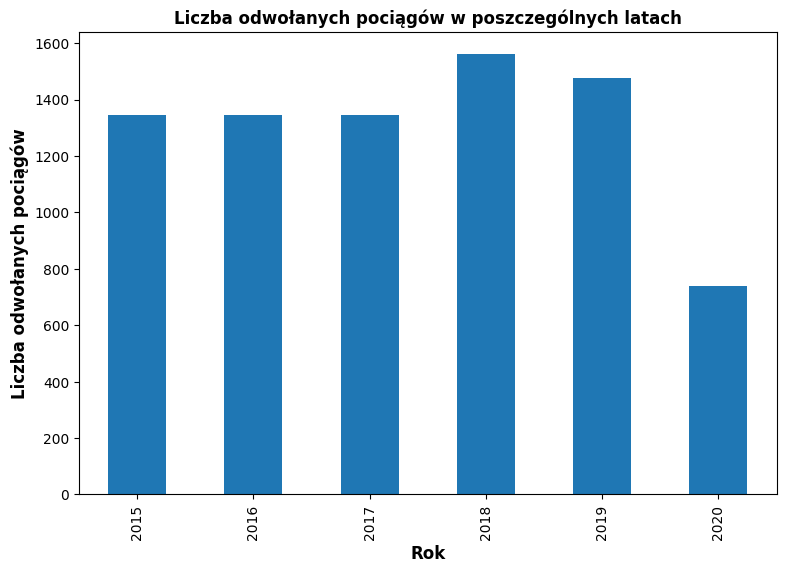

In [34]:
canceled_trains_by_year = df.groupby("Year")["Number_of_cancelled_trains"].count()

# Wygenerowanie wykresu słupkowego
ax = canceled_trains_by_year.plot(kind="bar", figsize=(9, 6))
ax.set_xlabel("Rok", fontweight="bold", fontsize=12)
ax.set_ylabel("Liczba odwołanych pociągów", fontweight="bold", fontsize=12)
ax.set_title("Liczba odwołanych pociągów w poszczególnych latach", fontweight="bold", fontsize=12)

plt.show()

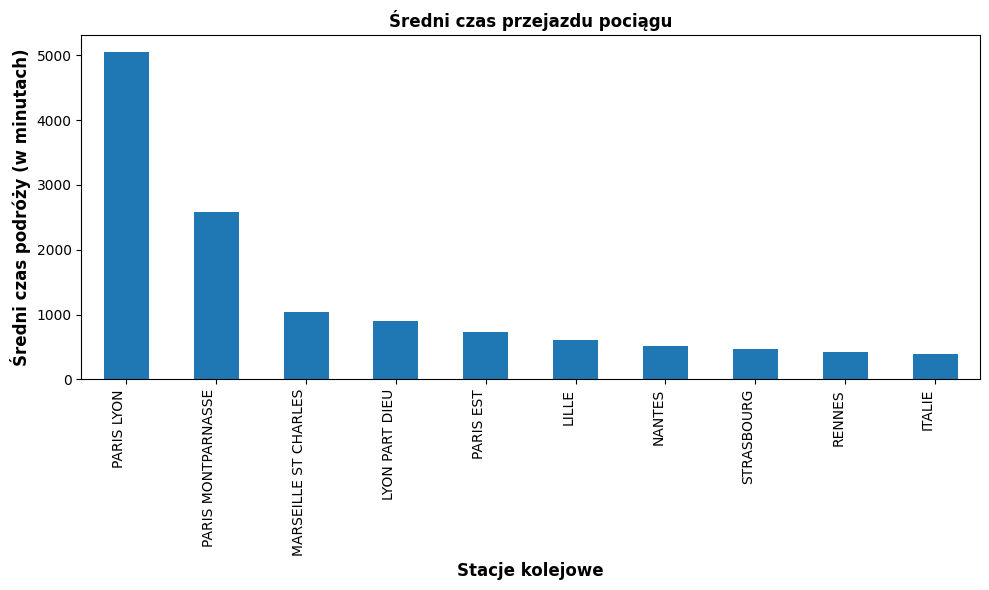

In [85]:
# Grupowanie po Departure_station i wyświetlenie średniego czasu podróży

average_travel_time = df.groupby("Departure_station")["Average_travel_time_(min)"].sum().nlargest(10)
average_travel_time_hours = average_travel_time / 60


# Wygenerowanie wykresu słupkowego
ax = average_travel_time_hours.plot(kind="bar", figsize=(10, 6))

ax.set_xticklabels(average_travel_time.index, ha="right")

ax.set_xlabel("Stacje kolejowe", fontweight = "bold", fontsize = 12)
ax.set_ylabel("Średni czas podróży (w minutach)", fontweight = "bold", fontsize = 12)
ax.set_title("Średni czas przejazdu pociągu", fontweight = "bold", fontsize = 12)

plt.tight_layout()
plt.show()



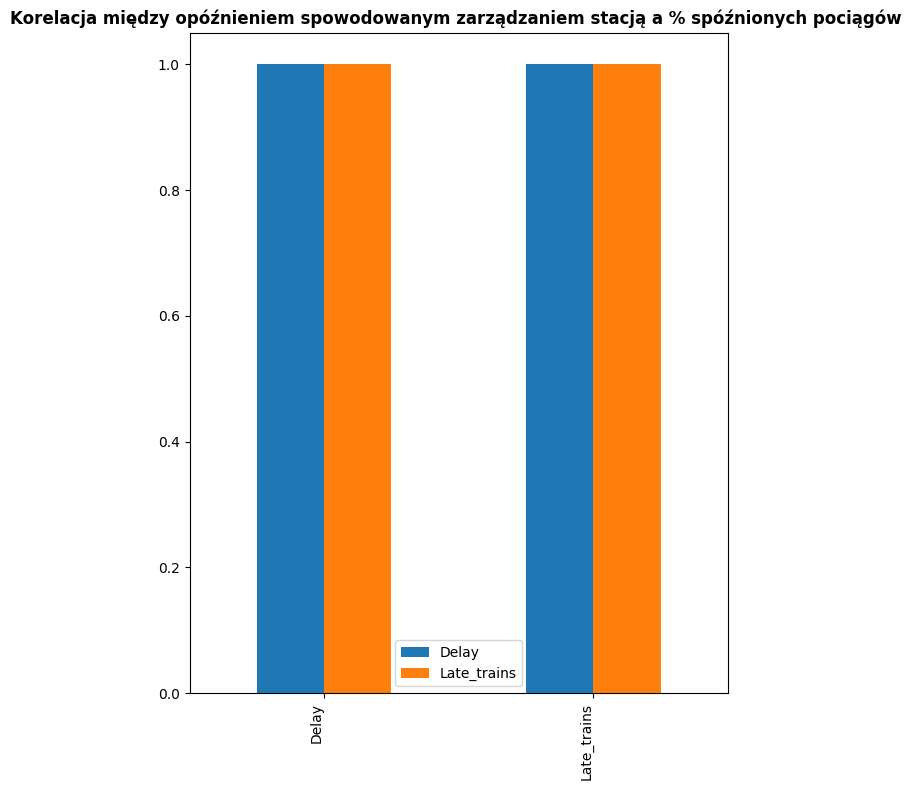

In [14]:
df.rename(columns={"Delay_due_to_station_management_and_reuse_of_material": "Delay", 
                   "%_trains_late_due_to_station_management_and_reuse_of_material": "Late_trains"}, inplace=True)

correlation = df[["Delay", "Late_trains"]].corr()

# Wygenerowanie wykresu słupkowego
ax = correlation.plot(kind="bar", figsize=(6, 8))
ax.set_xticklabels(correlation.index, ha="right")
ax.set_title("Korelacja między opóźnieniem spowodowanym zarządzaniem stacją a % spóźnionych pociągów ", fontweight = "bold", fontsize = 12)


plt.tight_layout()
plt.show()

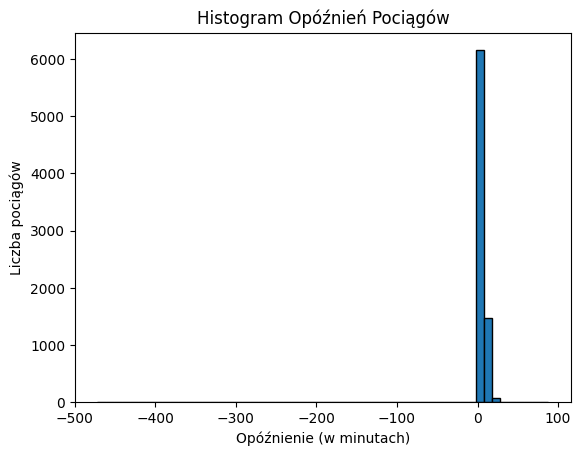

In [40]:
# Wybierz kolumnę z opóźnieniami (na przykład 'Average_delay_of_all_arriving_trains_(min)')
delays = df['Average_delay_of_all_arriving_trains_(min)']

# Utwórz histogram z mniejszymi przedziałami (co 10 minut)
plt.hist(delays, bins=range(int(min(delays)), int(max(delays)) + 1, 10), edgecolor='black')

plt.title('Histogram Opóźnień Pociągów')
plt.xlabel('Opóźnienie (w minutach)')
plt.ylabel('Liczba pociągów')

# Wyświetl wykres
plt.show()

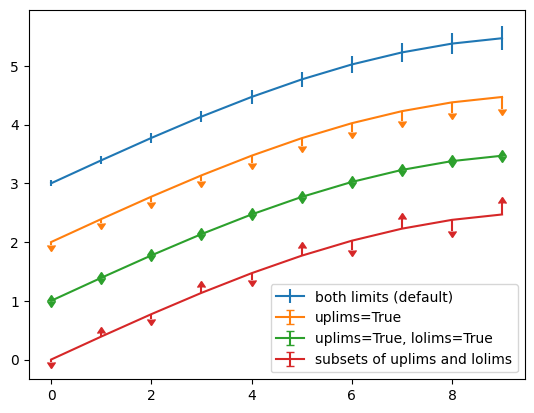

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')

#### Zrobić regresję regplot(), modelowanie